In [29]:
import polars as pl
import plotnine as p9

from tools.sequence.sequence import Sequence

In [30]:
df = pl.read_csv("combined.csv").with_columns(
    source=pl.when(pl.col("optimize_mfe").is_not_null())
    .then(pl.col("source") + pl.lit(" optimized mfe: ") + pl.col("optimize_mfe"))
    .otherwise(pl.col("source"))
)
df

name,cai_limit,output_sequence,optimize_mfe,time,output_cai,source,output_mfe
str,f64,str,str,f64,f64,str,f64
"""EGFP""",0.06,"""ATGGTGAGCAAGGGCGAGGAGTTATTCACG…",null,0.066582,0.939103,"""genetic""",-239.899994
"""SARSCOV2_SPIKE""",0.06,"""ATGTTCGTGTTCCTGGTGCTGCTGCCCCTG…",null,1.104039,0.941502,"""genetic""",-1320.400024
"""SARSCOV2_SPIKE""",0.04,"""ATGTTTGTGTTCCTGGTGCTGCTGCCTCTG…","""MIN""",17.647091,0.960153,"""genetic optimized mfe: MIN""",-1448.199951
"""LUCIFERASE""",0.02,"""ATGGAGGACGCCAAGAACATCAAGAAGGGC…",null,0.064608,0.981588,"""genetic""",-632.700012
"""SARSCOV2_SPIKE""",0.04,"""ATGTTCGTGTTCCTGGTGCTGCTGCCCCTG…","""MAX""",14.588045,0.960056,"""genetic optimized mfe: MAX""",-1277.199951
…,…,…,…,…,…,…,…
"""LUCIFERASE""",null,"""AUGGAGGACGCCAAGAACAUCAAGAAGGGG…",null,80.021719,0.984009,"""LinearDesign""",-817.700012
"""EGFP""",null,"""AUGGUGUCCAAGGGCGAGGAGCUCUUCACA…",null,12.717408,0.893123,"""LinearDesign""",-420.0
"""EGFP""",null,"""AUGGUGAGCAAGGGCGAGGAGCUGUUCACC…",null,13.083948,0.990268,"""LinearDesign""",-299.299988


In [31]:
df.select("name", "source", "time").group_by("name", "source").agg(
    pl.col("time").mean().alias("ave_time")
)

name,source,ave_time
str,str,f64
"""SARSCOV2_SPIKE""","""genetic optimized mfe: MAX""",16.890291
"""SARSCOV2_SPIKE""","""genetic optimized mfe: MIN""",23.731031
"""LUCIFERASE""","""LinearDesign""",79.744594
"""EGFP""","""genetic optimized mfe: MIN""",3.611731
"""LUCIFERASE""","""genetic optimized mfe: MIN""",10.983138
…,…,…
"""LUCIFERASE""","""genetic optimized mfe: MAX""",8.126007
"""CAS9_PE""","""genetic""",4.961229
"""EGFP""","""genetic""",0.035496


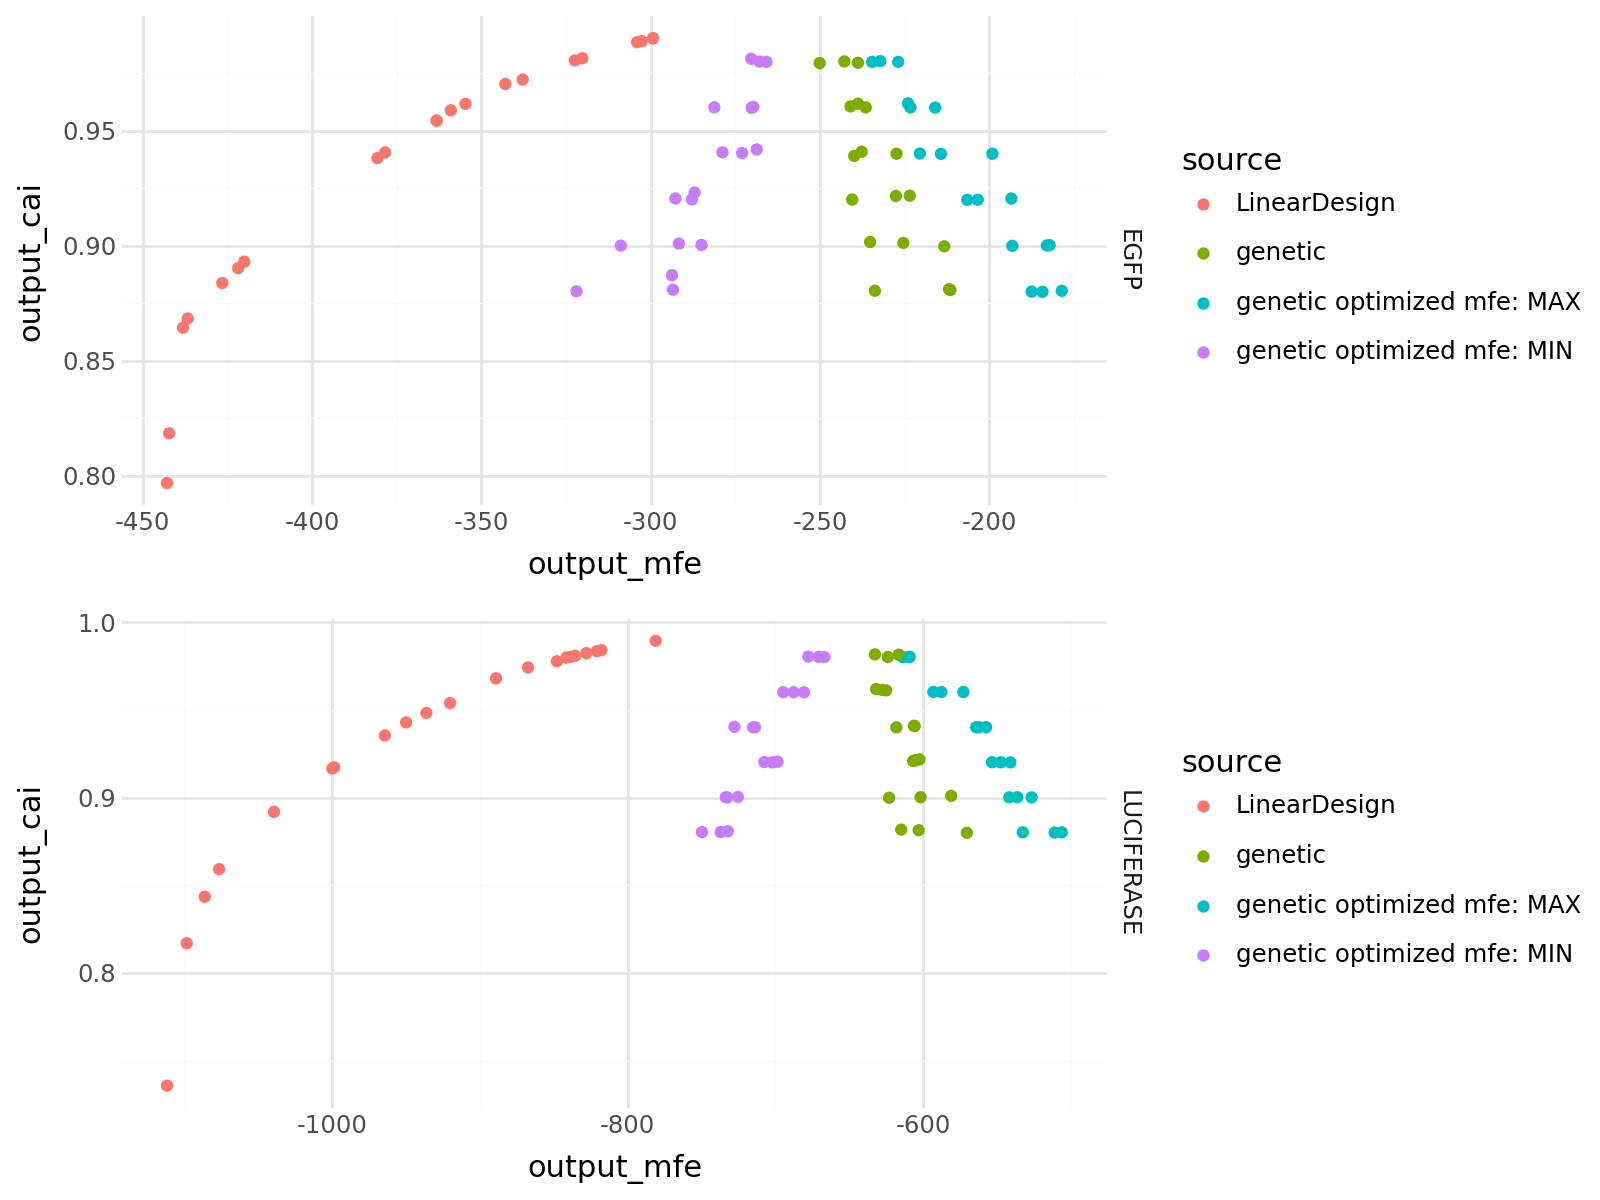

In [32]:
def _plot(name):
    return (
        p9.ggplot(df.filter(pl.col("name") == name), p9.aes("output_mfe", "output_cai"))
        + p9.geom_point(p9.aes(color="source"))
        + p9.facet_grid("name")
        + p9.theme_minimal()
        + p9.theme(figure_size=(8, 6))
    )


_plot("EGFP") / _plot("LUCIFERASE")

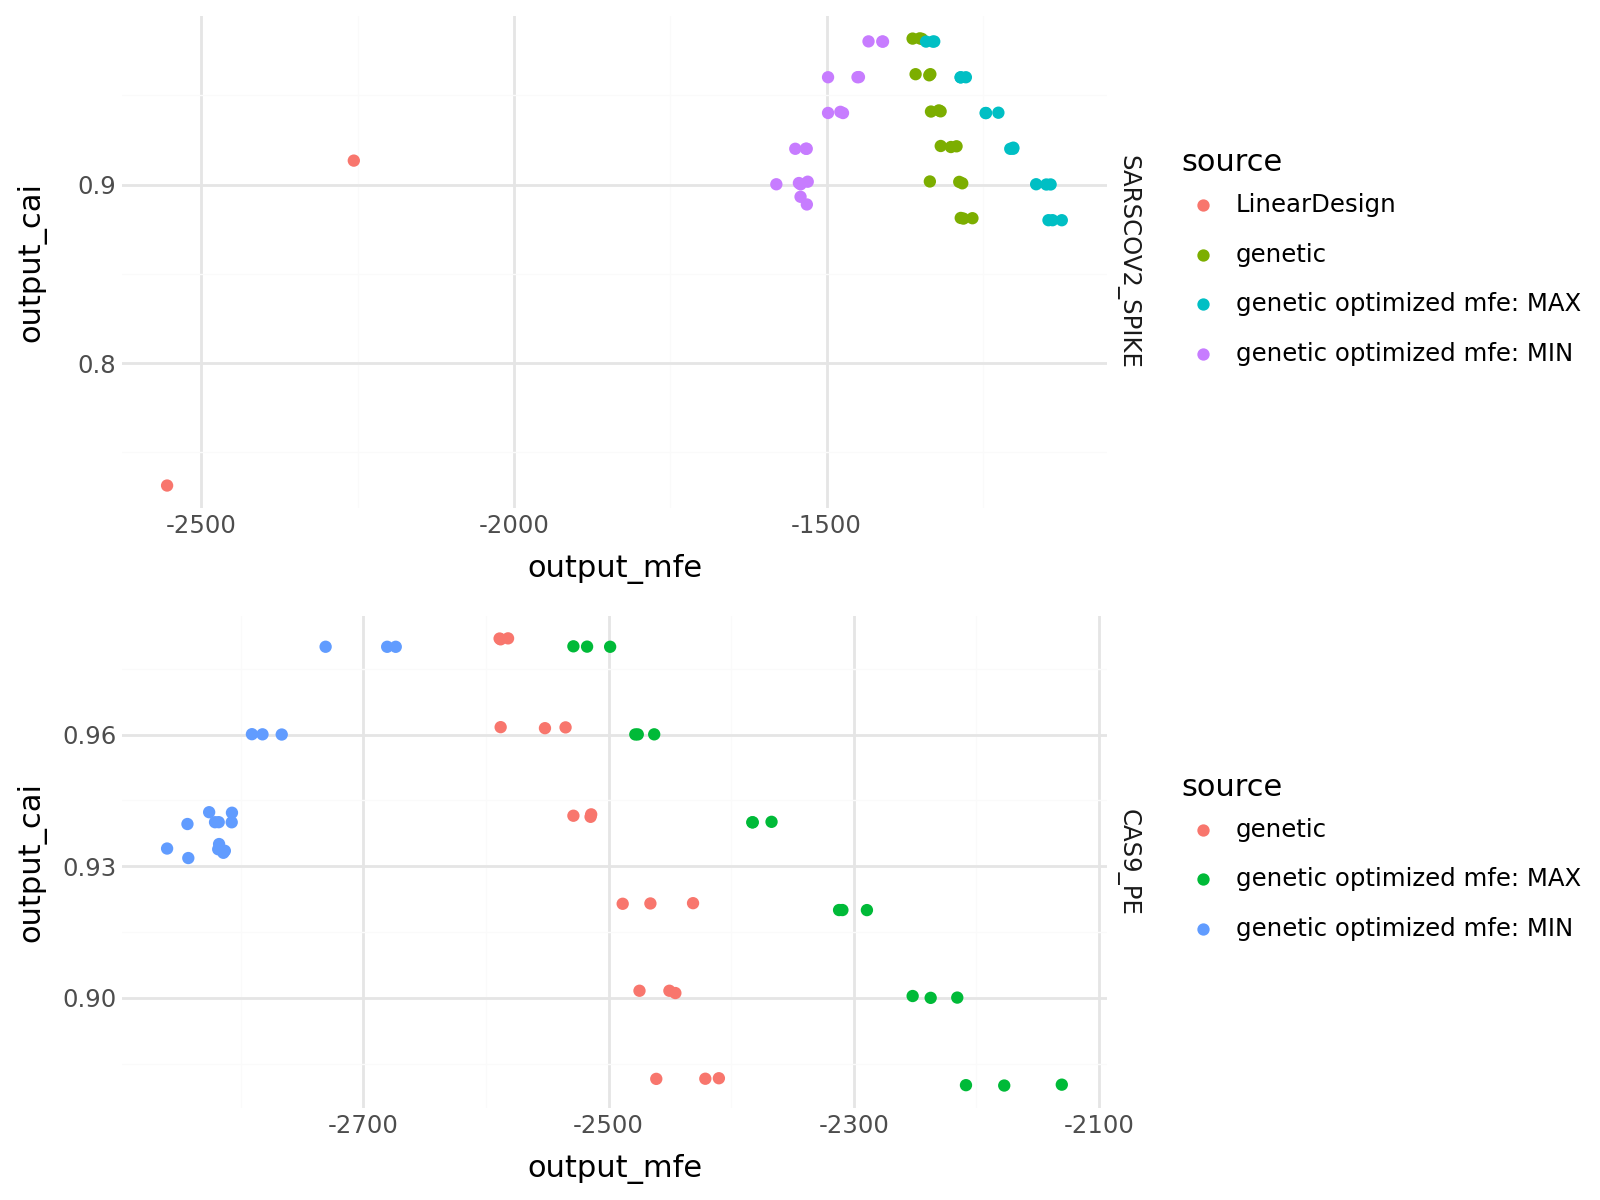

In [33]:
_plot("SARSCOV2_SPIKE") / _plot("CAS9_PE")